In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import imageio
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import load_img
from keras import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model
from keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Conv2D, Conv2DTranspose, MaxPooling2D, concatenate, Dropout
from tqdm import tqdm_notebook

## Reading data

In [36]:
def load_images(images_dir,imread_kws={}):
    """
    Reads    
    """
    data=[]
    for f in os.listdir(data_dir):
        #print(f)
        img = imageio.imread(uri=os.path.join(images_dir,f),**imread_kws)
        data.append(img)
    return np.array(data)
data_dir

'./tgs-salt-identification-challenge/train/images'

In [37]:
images_dir = './tgs-salt-identification-challenge/train/images'
masks_dir = './tgs-salt-identification-challenge/train/masks'
images = load_images(images_dir)
masks = load_images(masks_dir)
print("Shape of images: ", images.shape)
print("Shape of masks: ", masks.shape)

Shape of images:  (4000, 101, 101, 3)
Shape of masks:  (4000, 101, 101)


## Making train-val sets

In [41]:
random_state = 137
train_size=0.9
filenames = os.listdir(images_dir)
img_train, img_val, msk_train, msk_val, name_train, name_val = train_test_split(images,masks,filenames,train_size=train_size,random_state=random_state)
#filenames

/home/rio/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


## Visualizing data

In [84]:
def plot_image_mask(images,masks,nrows,ncols,filenames=None,mode="v",\
                    subplot_kws={"figsize":(12,6)}, imshow_img_kws={}, imshow_msk_kws={}):
    """
    Plots images with corresponding masks
    
    inputs
    ------
    images (list): arrays representing the images
    masks (list): arrays representing the masks
    filenames (list): strings with names of images. Defaults to None.
    mode (str): How to show data. Either 'h' (horizontal) or 'v' (vertical).
    return
    ------
    fig, ax (plt.subplot): figure and axis instances. 
    """
    subplot_kws["nrows"] = nrows
    subplot_kws["ncols"] = ncols
    fig, ax = plt.subplots(**subplot_kws)
    
    for ix, (img,msk) in enumerate(zip(images,masks)):
        if mode == "v":
            ax[2*(ix//ncols),ix%ncols].imshow(img,**imshow_img_kws)
            ax[2*(ix//ncols)+1,ix%ncols].imshow(msk,**imshow_msk_kws)
        elif mode == "h":
            
    
        
    
    

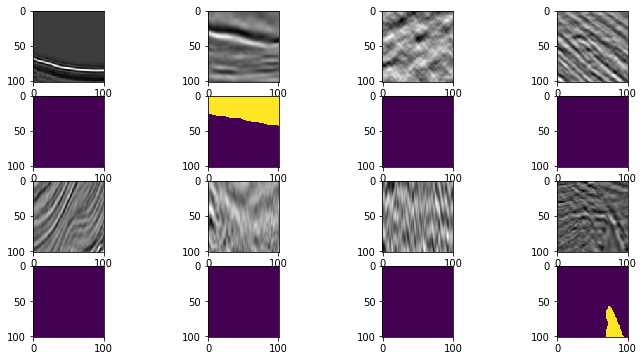

In [86]:
#Plotting four first training data
images=img_train[:8]
masks=msk_train[:8]
nrows=4
ncols=4
filenames=name_train[:8] 
plot_image_mask(images,masks,nrows,ncols,filenames)


## Starter UNET

Here we implement a simple vanilla U-Net for image segmentation. See the [original paper](https://arxiv.org/abs/1505.04597) and this [nice tutorial](https://towardsdatascience.com/review-u-net-biomedical-image-segmentation-d02bf06ca760). Also, these [Kaggle kernels](https://www.kaggle.com/c/tgs-salt-identification-challenge/kernels) are good references.

In [43]:
len(img_val)

400

In [44]:
len(msk_train)

3600

In [45]:
len(msk_val)

400

In [46]:
len(name_train)

3600

In [47]:
len(msk_val)

400

In [31]:
data_dir

'./tgs-salt-identification-challenge/train/images'

In [26]:
data[0]

array([[[123, 123, 123],
        [102, 102, 102],
        [ 70,  70,  70],
        ...,
        [ 79,  79,  79],
        [ 83,  83,  83],
        [ 89,  89,  89]],

       [[123, 123, 123],
        [117, 117, 117],
        [ 83,  83,  83],
        ...,
        [ 78,  78,  78],
        [ 81,  81,  81],
        [ 91,  91,  91]],

       [[120, 120, 120],
        [124, 124, 124],
        [100, 100, 100],
        ...,
        [ 78,  78,  78],
        [ 83,  83,  83],
        [ 91,  91,  91]],

       ...,

       [[ 73,  73,  73],
        [ 80,  80,  80],
        [102, 102, 102],
        ...,
        [ 97,  97,  97],
        [ 93,  93,  93],
        [ 88,  88,  88]],

       [[ 73,  73,  73],
        [ 73,  73,  73],
        [ 93,  93,  93],
        ...,
        [ 96,  96,  96],
        [ 93,  93,  93],
        [ 88,  88,  88]],

       [[ 76,  76,  76],
        [ 67,  67,  67],
        [ 81,  81,  81],
        ...,
        [ 96,  96,  96],
        [ 93,  93,  93],
        [ 89,  89,  89]]